### Import Library

In [68]:
from torchvision import transforms
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import numpy as np

### Import dataset

In [69]:
import os
os.environ["KAGGLEHUB_CACHE_DIR"] = "C:/Users/fianc/Documents/Project/ML/data"

import kagglehub

path = kagglehub.dataset_download("dheerajperumandla/drowsiness-dataset")
path_pred = kagglehub.dataset_download("adinishad/prediction-images")
print("Path to dataset files:", path)
print("Path to prediction images:", path_pred)

Path to dataset files: C:\Users\fianc\.cache\kagglehub\datasets\dheerajperumandla\drowsiness-dataset\versions\1
Path to prediction images: C:\Users\fianc\.cache\kagglehub\datasets\adinishad\prediction-images\versions\9


### Preprocessing
Label

In [70]:
labels = os.listdir("C:/Users/fianc/.cache/kagglehub/datasets/dheerajperumandla/drowsiness-dataset/versions/1/train")
labels

['Closed', 'no_yawn', 'Open', 'yawn']

Cek gambar

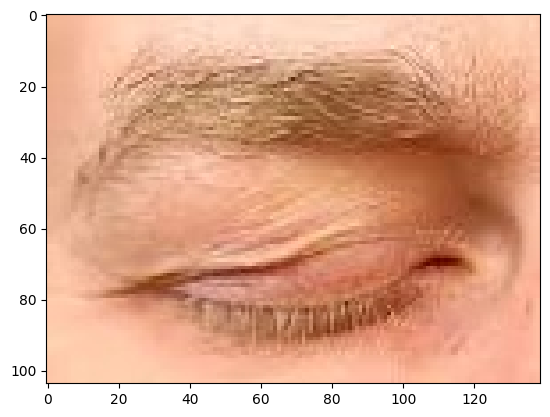

In [71]:
plt.imshow(plt.imread("C:/Users/fianc/.cache/kagglehub/datasets/dheerajperumandla/drowsiness-dataset/versions/1/train/Closed/_30.jpg"))

In [6]:
a = plt.imread("C:/Users/fianc/.cache/kagglehub/datasets/dheerajperumandla/drowsiness-dataset/versions/1/train/yawn/32.jpg")
a.shape

(480, 640, 3)

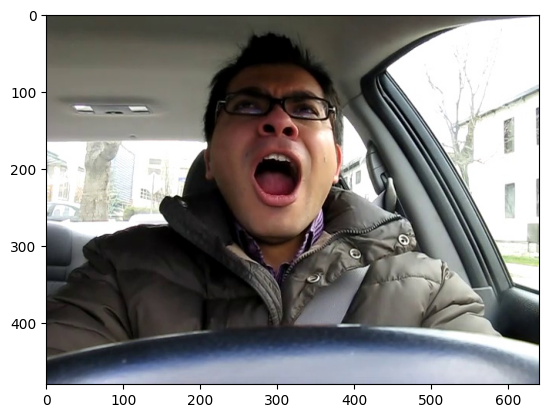

In [7]:
plt.imshow(plt.imread("C:/Users/fianc/.cache/kagglehub/datasets/dheerajperumandla/drowsiness-dataset/versions/1/train/yawn/32.jpg"))

Mengekstrak gambar untuk daerah yawn atau no_yawn menggunakan cascade classifier

In [72]:
def face_for_yawn(direc="C:/Users/fianc/.cache/kagglehub/datasets/dheerajperumandla/drowsiness-dataset/versions/1/train",
                  face_cas_path="C:/Users/fianc/.cache/kagglehub/datasets/adinishad/prediction-images/versions/9/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 64 # mengurangi ukuran gambar untuk efisiensi
    categories = ['no_yawn', 'yawn']
    for category in categories:
        path_link = os.path.join(direc, category) # handling the path errors (like \ /) for each category to maintain consistensy in every OS
        class_num1 = categories.index(category) # assigning a number to each category, from 0 to n-1
        print(class_num1) # 0 for yawn, 1 for no_yawn
        for image in os.listdir(path_link): # for every image in array of images's names in the directory
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR) # reading the image in color
            face_cascade = cv2.CascadeClassifier(face_cas_path) # initializing the face cascade classifier with the haarcascade xml file path
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5) # detecting faces in the image using the cascade classifier, 1.3 is the scale factor and 5 is the minimum neighbors
            # It identifies objects based on xml file within an input image and returns a list of rectangles, each representing a detected object. 
            for (x, y, w, h) in faces: # coordinated and size of region of the face
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2) # drawing rectangle : (image, start_point, end_point, color, thickness)
                roi_color = img[y:y+h, x:x+w] # slicing the image to get the region of interest (ROI) which is the face
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE)) # Resize the ROI to a fixed size (128x128)
                yaw_no.append([resized_array, class_num1]) # appending the resized image and its class number to the yaw_no list
    return yaw_no


Mengekstrak gambar untuk daerah open_eye atau closed_eye

In [73]:
def get_data(dir_path = "C:/Users/fianc/.cache/kagglehub/datasets/dheerajperumandla/drowsiness-dataset/versions/1/train"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 64 # mengurangi ukuran gambar untuk efisiensi
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data


In [74]:
def append_data_yawn():
    yaw_no = face_for_yawn()
    # Separate images and labels
    images = [item[0] for item in yaw_no]
    labels = [item[1] for item in yaw_no]
    # Stack images into a 4D array
    images_array = np.stack(images)
    labels_array = np.array(labels)
    return images_array, labels_array

new_images_yawn, new_labels_yawn = append_data_yawn()

0
1


In [75]:
def append_data_eye():
    eye = get_data()
    # Separate images and labels
    images = [item[0] for item in eye]
    labels = [item[1] for item in eye]
    # Stack images into a 4D array
    images_array = np.stack(images)
    labels_array = np.array(labels)
    return images_array, labels_array

new_images_eye, new_labels_eye = append_data_eye()

2
3


In [76]:
X_yawn = []
y_yawn = []

for image in new_images_yawn:
    X_yawn.append(image)

for label in new_labels_yawn:
    y_yawn.append(label)

In [77]:
X_eye = []
y_eye = []

for image in new_images_eye:
    X_eye.append(image)

for label in new_labels_eye:
    y_eye.append(label)

In [78]:
X_yawn = np.array(X_yawn)
X_yawn = X_yawn.reshape(-1, 64, 64, 3)

X_eye = np.array(X_eye)
X_eye = X_eye.reshape(-1, 64, 64, 3)

In [79]:
label_bin = LabelBinarizer()
y_yawn = label_bin.fit_transform(y_yawn)
y_eye = label_bin.fit_transform(y_eye)

In [80]:
y_yawn = np.array(y_yawn)
y_eye = np.array(y_eye)

In [81]:
seed = 0
test_size = 0.30
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(X_yawn, y_yawn, random_state=seed, test_size=test_size)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_eye, y_eye, random_state=seed, test_size=test_size)

In [82]:
len(X_test_y)
len(X_test_e)

436

### Import Library 2

In [83]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [84]:
tf.__version__

'2.19.0'

In [85]:
keras.__version__

'3.10.0'

### Augmentasi Data

In [98]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator_y = train_generator.flow(np.array(X_train_y), y_train_y, shuffle=False)
test_generator_y = test_generator.flow(np.array(X_test_y), y_test_y, shuffle=False)

train_generator_e = train_generator.flow(np.array(X_train_e), y_train_e, shuffle=False)
test_generator_e = test_generator.flow(np.array(X_test_e), y_test_e, shuffle=False)

### Feature Extraction

Pretrained model : resnet50

In [99]:
resnet_base = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

In [100]:
model_y = Sequential()
model_y.add(resnet_base)
model_y.add(Flatten())
model_y.add(Dense(64, activation='relu'))
model_y.add(Dense(1, activation='sigmoid')) # Changed to 1 unit with sigmoid for binary classification

Freeze semua layer, untuk transfer learning

In [101]:
for layer in resnet_base.layers:
    layer.trainable = False

In [ ]:
# model = Sequential()

# model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(32, (3, 3), activation="relu"))
# model.add(MaxPooling2D(2, 2))

# model.add(Flatten())
# model.add(Dropout(0.5))

# model.add(Dense(64, activation="relu"))
# model.add(Dense(4, activation="softmax"))

# model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# model.summary()

AttributeError: 'Functional' object has no attribute 'add'

### Training

Transfer learning process, using drowsiness face task.

Learing rate = 0.001
Epoch = 10

In [102]:
learning_rate = 0.001  # You can change this value
optimizer = Adam(learning_rate=learning_rate)

model_y.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [103]:
history_y = model_y.fit(train_generator_y, epochs=30, validation_data=test_generator_y, shuffle=True, validation_steps=len(test_generator_y))

Epoch 1/30


c:\Users\fianc\Documents\BootcampAI\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 489ms/step - accuracy: 0.5513 - loss: 0.7185 - val_accuracy: 0.7817 - val_loss: 0.4847
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 446ms/step - accuracy: 0.7466 - loss: 0.5201 - val_accuracy: 0.8099 - val_loss: 0.4276
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 323ms/step - accuracy: 0.7745 - loss: 0.4315 - val_accuracy: 0.8521 - val_loss: 0.3561
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.8374 - loss: 0.3771 - val_accuracy: 0.8873 - val_loss: 0.2978
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.8307 - loss: 0.3785 - val_accuracy: 0.8873 - val_loss: 0.2912
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - accuracy: 0.8444 - loss: 0.3520 - val_accuracy: 0.8451 - val_loss: 0.3184
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.8942 - loss: 0.2890 - val_accuracy: 0.8662 - val_loss: 0.2919
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.9013 - loss: 0.2641 - val_accuracy: 0.8521 - val_

UnFreeze semua layer resnet, untuk fine-tuning sebanyak 2 kali

In [104]:
model_e = Sequential()
model_e.add(resnet_base)
model_e.add(Flatten())
model_e.add(Dense(64, activation='relu'))
model_e.add(Dense(1, activation='sigmoid')) # Changed to 1 unit with sigmoid for binary classification

In [106]:
learning_rate = 0.001  # You can change this value
optimizer = Adam(learning_rate=learning_rate)

model_e.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [107]:
history_e = model_e.fit(train_generator_e, epochs=30, validation_data=test_generator_e, shuffle=True, validation_steps=len(test_generator_e))

Epoch 1/30


c:\Users\fianc\Documents\BootcampAI\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.8663 - loss: 0.3221 - val_accuracy: 0.9679 - val_loss: 0.0998
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.9618 - loss: 0.1050 - val_accuracy: 0.9748 - val_loss: 0.0828
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.9752 - loss: 0.0717 - val_accuracy: 0.9679 - val_loss: 0.0767
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 281ms/step - accuracy: 0.9744 - loss: 0.0662 - val_accuracy: 0.9817 - val_loss: 0.0751
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - accuracy: 0.9870 - loss: 0.0473 - val_accuracy: 0.9702 - val_loss: 0.0636
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.9885 - loss: 0.0465 - val_accuracy: 0.9748 - val_loss: 0.0673
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.9746 - loss: 0.0632 - val_accuracy: 0.9702 - val_loss: 0.0994
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.9816 - loss: 0.0637 - val_accuracy: 0.9748 - val

In [108]:
for layer in resnet_base.layers:
    layer.trainable = True

Cek akurasi

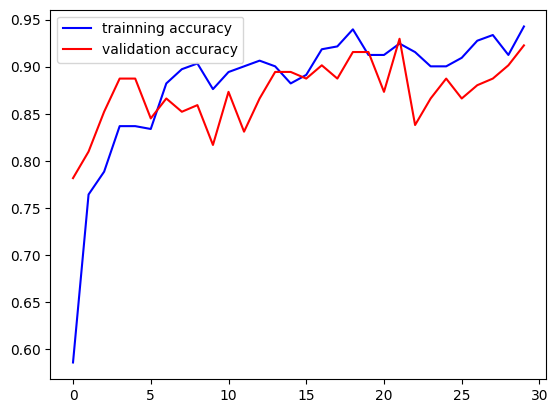

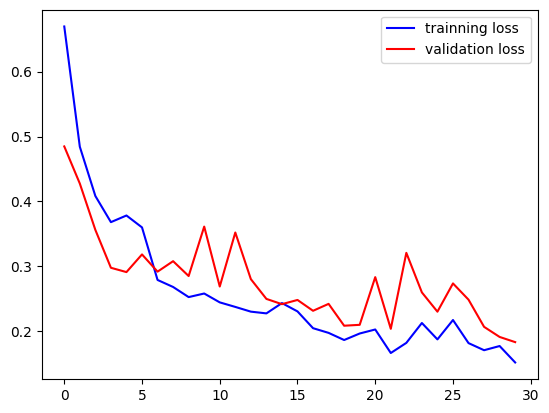

In [109]:
accuracy = history_y.history['accuracy']
val_accuracy = history_y.history['val_accuracy']
loss = history_y.history['loss']
val_loss = history_y.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

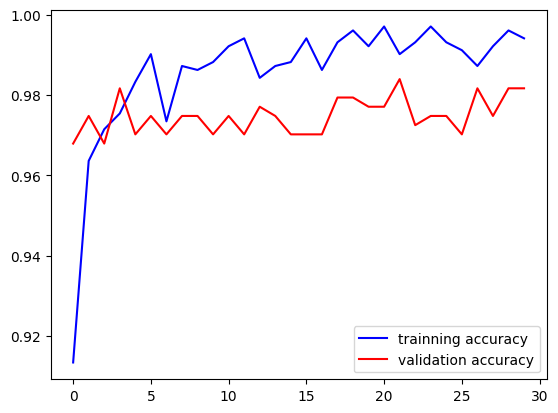

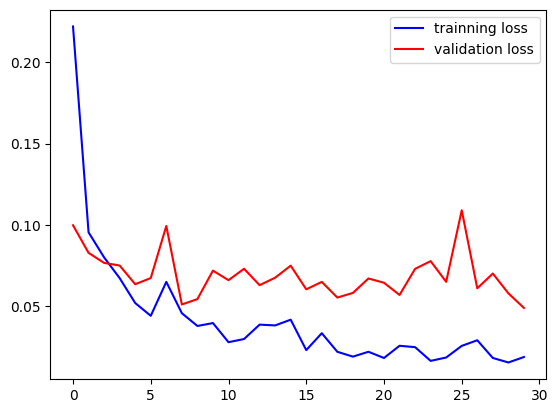

In [110]:
accuracy = history_e.history['accuracy']
val_accuracy = history_e.history['val_accuracy']
loss = history_e.history['loss']
val_loss = history_e.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [111]:
model_y.save("drowiness_new6.h5.keras")
model_e.save("drowiness_new6.h5.keras")

In [121]:
model_y.save("drowiness_new6.model_y.keras")
model_e.save("drowiness_new6.model_e.keras")

### Prediction

In [114]:
prediction_y = model_y.predict(X_test_y)
prediction_classes_y = np.argmax(prediction_y, axis=1)
prediction_classes_y

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [115]:
prediction_e = model_e.predict(X_test_e)
prediction_classes_e = np.argmax(prediction_e, axis=1)
prediction_classes_e

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 277ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [118]:
from sklearn.metrics import classification_report

predicted_probability_y = model_y.predict(X_test_y)
predicted_classes_binary_y = (predicted_probability_y > 0.5).astype(int)

y_test_flattened_y = y_test_y.flatten()
predicted_classes_binary_flattened_y = predicted_classes_binary_y.flatten()

binary_target_names_y = ['no_yawn', 'yawn']

print(classification_report(y_test_flattened_y, predicted_classes_binary_flattened_y, target_names=binary_target_names_y))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step
              precision    recall  f1-score   support

     no_yawn       1.00      0.01      0.03        68
        yawn       0.52      1.00      0.69        74

    accuracy                           0.53       142
   macro avg       0.76      0.51      0.36       142
weighted avg       0.75      0.53      0.37       142



In [147]:
predicted_probability_e = model_e.predict(X_test_e)
predicted_classes_binary_e = (predicted_probability_e > 0.5).astype(int)

y_test_flattened_e = y_test_e.flatten()
predicted_classes_binary_flattened_e = predicted_classes_binary_e.flatten()

binary_target_names_e = ['Closed', 'Open']

print(classification_report(y_test_flattened_e, predicted_classes_binary_flattened_e, target_names=binary_target_names_e))

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 295ms/step
              precision    recall  f1-score   support

      Closed       0.95      0.73      0.82       216
        Open       0.78      0.96      0.86       220

    accuracy                           0.84       436
   macro avg       0.86      0.84      0.84       436
weighted avg       0.86      0.84      0.84       436



In [148]:
IMG_SIZE = 64
def prepare(filepath, face_cas="C:/Users/fianc/.cache/kagglehub/datasets/adinishad/prediction-images/versions/9/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255.0
    face_cascade = cv2.CascadeClassifier(face_cas)
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5.keras")

c:\Users\fianc\Documents\BootcampAI\myenv\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 62 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [149]:
def prepare_eye(filepath, 
                face_cas="C:/Users/fianc/.cache/kagglehub/datasets/adinishad/prediction-images/versions/9/haarcascade_frontalface_default.xml", 
                eye_cas="C:/Users/fianc/.cache/kagglehub/datasets/adinishad/prediction-images/versions/9/haarcascade.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    if img_array is None:
        print(f"Error: Could not read image from {filepath}")
        return None
    face_cascade = cv2.CascadeClassifier(face_cas)
    eye_cascade = cv2.CascadeClassifier(eye_cas)
    faces = face_cascade.detectMultiScale(img_array, 1.3, 5)
    if len(faces) == 0:
        print("No face detected")
        return None
    eyes = []
    for (x, y, w, h) in faces:
        roi_color = img_array[y:y+h, x:x+w]
        detected_eyes = eye_cascade.detectMultiScale(roi_color)
        for (ex, ey, ew, eh) in detected_eyes:
            eye_roi = roi_color[ey:ey+eh, ex:ex+ew]
            resized_array = cv2.resize(eye_roi, (IMG_SIZE, IMG_SIZE))
            eyes.append(resized_array / 255.0) # Normalize after resizing

    if len(eyes) == 0:
        print("No eyes detected")
        return None
    return np.array(eyes) # Return a numpy array of eyes

In [ ]:
prediction_probability_yawn = model_y.predict([prepare("C:/Users/fianc/.cache/kagglehub/datasets/dheerajperumandla/drowsiness-dataset/versions/1/train/yawn/394.jpg")])
prediction_probability_eyeclosed = model_e.predict([prepare_eye("C:/Users/fianc/.cache/kagglehub/datasets/dheerajperumandla/drowsiness-dataset/versions/1/train/yawn/394.jpg")])

# Assuming the single output is the probability of the positive class ('yawn')
yawn_probability = prediction_probability_yawn[0][0]
not_yawn_probability = 1 - yawn_probability

closed_probability = prediction_probability_eyeclosed[0][0]  # Assuming the model outputs a single probability for closed eyes
notclosed_probability = 1 - closed_probability

# Using the binary_target_names defined in the classification report cell for clarity
print(f"Prediction for {binary_target_names_y[1]} : {yawn_probability * 100:.2f} %")
print(f"Prediction for {binary_target_names_y[0]} : {not_yawn_probability * 100:.2f} %")

print(f"Prediction for {binary_target_names_e[1]} : {closed_probability * 100:.2f} %")
print(f"Prediction for {binary_target_names_e[0]} : {notclosed_probability * 100:.2f} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Prediction for yawn : 93.32 %
Prediction for no_yawn : 6.68 %
Prediction for Open : 99.99 %
Prediction for Closed : 0.01 %


: 

In [158]:
prediction_probability_yawn = model_y.predict([prepare("C:/Users/fianc/Documents/Dataset nunut/b.jpg")])
prediction_probability_eyeclosed = model_e.predict([prepare_eye("C:/Users/fianc/Documents/Dataset nunut/b.jpg")])

# Assuming the single output is the probability of the positive class ('yawn')
yawn_probability = prediction_probability_yawn[0][0]
not_yawn_probability = 1 - yawn_probability

closed_probability = prediction_probability_eyeclosed[0][0]  # Assuming the model outputs a single probability for closed eyes
notclosed_probability = 1 - closed_probability

# Using the binary_target_names defined in the classification report cell for clarity
print(f"Prediction for {binary_target_names_y[1]} : {yawn_probability * 100:.2f} %")
print(f"Prediction for {binary_target_names_y[0]} : {not_yawn_probability * 100:.2f} %")

print(f"Prediction for {binary_target_names_e[1]} : {closed_probability * 100:.2f} %")
print(f"Prediction for {binary_target_names_e[0]} : {notclosed_probability * 100:.2f} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Prediction for yawn : 99.78 %
Prediction for no_yawn : 0.22 %
Prediction for Open : 99.76 %
Prediction for Closed : 0.24 %


In [129]:
prediction_probability = model.predict([prepare("C:/Users/fianc/.cache/kagglehub/datasets/dheerajperumandla/drowsiness-dataset/versions/1/train/yawn/32.jpg")])

# Assuming the single output is the probability of the positive class ('yawn')
yawn_probability = prediction_probability[0][0]
closed_probability = 1 - yawn_probability

# Using the binary_target_names defined in the classification report cell for clarity
binary_target_names = ['no_yawn', 'yawn'] # Assuming 0: Closed, 1: Yawn

print(f"Prediction for {binary_target_names[1]} : {yawn_probability * 100:.2f} %")
print(f"Prediction for {binary_target_names[0]} : {closed_probability * 100:.2f} %")

c:\Users\fianc\Documents\BootcampAI\myenv\lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_8
Received: inputs=('Tensor(shape=(1, 64, 64, 3))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
Prediction for yawn : 96.47 %
Prediction for no_yawn : 3.53 %


In [43]:
prediction_probability = model.predict([prepare("C:/Users/fianc/Documents/Dataset nunut/yawn.jpg")])

# Assuming the single output is the probability of the positive class ('yawn')
yawn_probability = prediction_probability[0][0]
closed_probability = 1 - yawn_probability

# Using the binary_target_names defined in the classification report cell for clarity
binary_target_names = ['no_yawn', 'yawn'] # Assuming 0: Closed, 1: Yawn

print(f"Prediction for {binary_target_names[1]} : {yawn_probability * 100:.2f} %")
print(f"Prediction for {binary_target_names[0]} : {closed_probability * 100:.2f} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prediction for yawn : 77.85 %
Prediction for no_yawn : 22.15 %


In [42]:
prediction_probability = model.predict([prepare("C:/Users/fianc/Documents/Dataset nunut/noyawn.jpg")])

# Assuming the single output is the probability of the positive class ('yawn')
yawn_probability = prediction_probability[0][0]
closed_probability = 1 - yawn_probability

# Using the binary_target_names defined in the classification report cell for clarity
binary_target_names = ['no_yawn', 'yawn'] # Assuming 0: Closed, 1: Yawn

print(f"Prediction for {binary_target_names[1]} : {yawn_probability * 100:.2f} %")
print(f"Prediction for {binary_target_names[0]} : {closed_probability * 100:.2f} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Prediction for yawn : 62.71 %
Prediction for no_yawn : 37.29 %


In [44]:
prediction_probability = model.predict([prepare("C:/Users/fianc/Documents/Dataset nunut/test1.jpg")])

# Assuming the single output is the probability of the positive class ('yawn')
yawn_probability = prediction_probability[0][0]
closed_probability = 1 - yawn_probability

# Using the binary_target_names defined in the classification report cell for clarity
binary_target_names = ['no_yawn', 'yawn'] # Assuming 0: Closed, 1: Yawn

print(f"Prediction for {binary_target_names[1]} : {yawn_probability * 100:.2f} %")
print(f"Prediction for {binary_target_names[0]} : {closed_probability * 100:.2f} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Prediction for yawn : 77.71 %
Prediction for no_yawn : 22.29 %


In [45]:
prediction_probability = model.predict([prepare("C:/Users/fianc/Documents/Dataset nunut/face2.jpg")])

# Assuming the single output is the probability of the positive class ('yawn')
yawn_probability = prediction_probability[0][0]
closed_probability = 1 - yawn_probability

# Using the binary_target_names defined in the classification report cell for clarity
binary_target_names = ['no_yawn', 'yawn'] # Assuming 0: Closed, 1: Yawn

print(f"Prediction for {binary_target_names[1]} : {yawn_probability * 100:.2f} %")
print(f"Prediction for {binary_target_names[0]} : {closed_probability * 100:.2f} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction for yawn : 65.92 %
Prediction for no_yawn : 34.08 %


In [46]:
prediction_probability = model.predict([prepare("C:/Users/fianc/.cache/kagglehub/datasets/dheerajperumandla/drowsiness-dataset/versions/1/train/no_yawn/1.jpg")])

# Assuming the single output is the probability of the positive class ('yawn')
yawn_probability = prediction_probability[0][0]
closed_probability = 1 - yawn_probability

# Using the binary_target_names defined in the classification report cell for clarity
binary_target_names = ['no_yawn', 'yawn'] # Assuming 0: Closed, 1: Yawn

print(f"Prediction for {binary_target_names[1]} : {yawn_probability * 100:.2f} %")
print(f"Prediction for {binary_target_names[0]} : {closed_probability * 100:.2f} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Prediction for yawn : 46.99 %
Prediction for no_yawn : 53.01 %
